# Final Project: Analysis of GW200129

For this assignment, you will have to conduct an analysis of the gravitational-wave signal GW200129_065458 (thereafter simply GW200129). This analysis should be done within a Jupyter notebook, with many comments in [Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb) desribing and **justifying** the steps taken.

- The writing should be at the level of a fellow student of the class
- Describe **in details** every step of your analysis throughout the notebook.
- Any setting choice (sampling rate, window parameter, FFT length, etc...) needs to be justified, either by its own investigation or relevant citations from the literature.
- Code alone, without a detailed descriptions of what is done and why, is worth at most half marks.
- Remember to re-run your notebook from scratch after a kernel re-start before submission.

NOTE: you can use any of the notebooks covered in the class, or code available online, _provided that you justify the settings and methods used_.

## Introduction (15 points)
Minimum 300 words.
- Write an introduction to this analysis, citing the relevant context and literature.
- Write a short summary of what is done in the notebook.

In [21]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
!pip install -q gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.1 MB/s eta 0:00:00


In [4]:
! pip install -q lalsuite pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 MB 16.2 MB/s eta 0:00:00


In [5]:
from scipy.signal import get_window

In [8]:
from gwosc.datasets import event_gps

In [9]:
from gwpy.timeseries import TimeSeries

## The data and noise model (10 points)

- Download and plot the relevant gravitational-wave data for GW200129.
- Compute and plot the Power Spectrum Density. (chapter 5)
- Compute and plot the whitened data. Use filters if necessary to best highlight where the signal is (or might be).

In [31]:
gps = event_gps("GW200129_065458") #finds time centre of GW200129
start = int(gps) -512
end = int(gps) + 512 # sets the start and end of the event as +- 15 seconds from the time centre

In [32]:
GW_200129_strain_H1 = TimeSeries.fetch_open_data('H1', start, end) #fetches the time series from H1
GW_200129_strain_L1 = TimeSeries.fetch_open_data('L1', start, end) #fetches the time series from L1

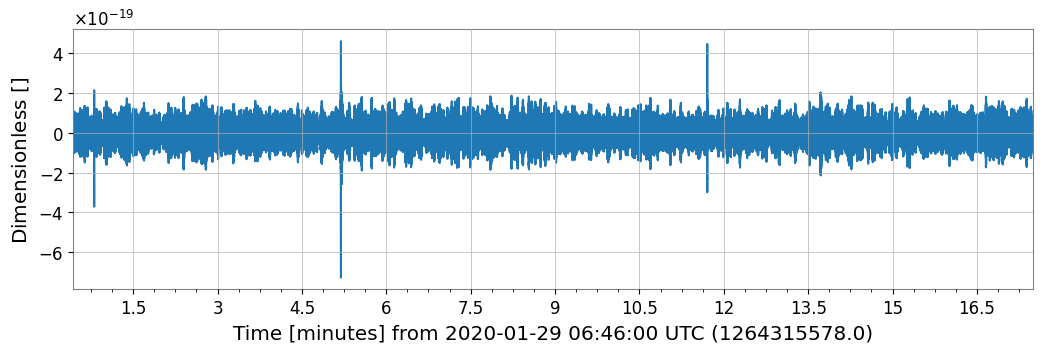

In [33]:

H1_strain = GW_200129_strain_H1.plot()



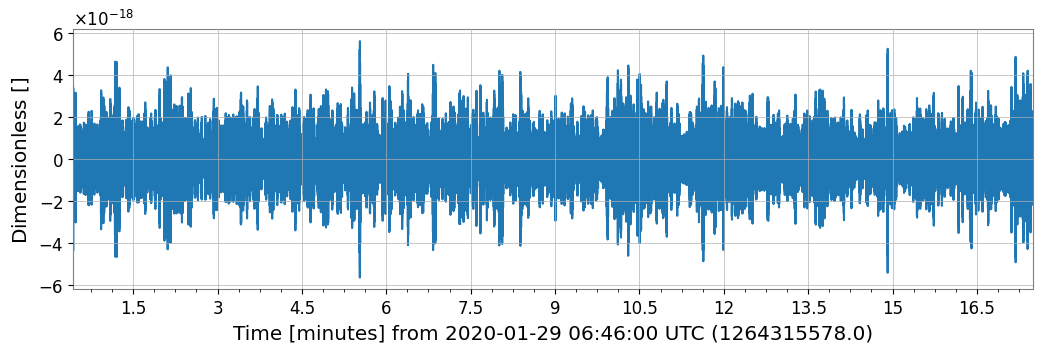

In [34]:
L1_strain = GW_200129_strain_L1.plot()

In [35]:
window=get_window(('tukey',1./4.),GW_200129_strain_H1.size)
scaling_factor=np.abs(window).mean()
strain_H1_fft=(GW_200129_strain_H1*window).fft()/scaling_factor
strain_H1_afft=GW_200129_strain_H1.average_fft(window=('tukey',1./4.)) # built-in function which already includes the normalisation

<Figure size 800x800 with 0 Axes>

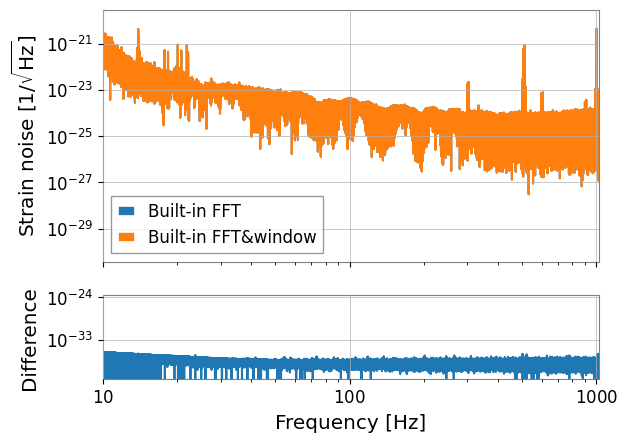

In [36]:
plt.figure(figsize=(8, 8))
f, (a0, a1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3,1]})
a0.loglog(strain_H1_fft.frequencies,np.abs(strain_H1_fft),label='Built-in FFT')
a0.loglog(strain_H1_afft.frequencies,np.abs(strain_H1_afft),label='Built-in FFT&window')
a0.set_ylabel('Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
a0.legend(loc='lower left')
a1.loglog(strain_H1_fft.frequencies,np.abs(strain_H1_fft-strain_H1_afft))
a1.set_ylabel('Difference')
a1.set_xlabel('Frequency [Hz]')
a1.set_xlim(10,1024);

## The signal model (10 points)

- Generate and plot a CBC signal which you expect to be a good match for the signal. Use the literature, and cite your sources
- Generate and plot a phenomenological model (sometimes refer to as a "Burst" model). A model whose parameters describe the shape of the waveform itself, not the source.
- Plot those those two signals together, and try to find _by eye_ parameters that maximises that overlap. Discuss.

NOTE: remember that gravitational-wave are redshifted.

## Detection (25 points)
Limiting yourself to a coincident (**not** coherent) analysis:
- Compute the SNR time series for the CBC signal model
- Compute the SNR time series for the Burst signal model
- Discuss the differences, if any.
- Estimate a bound on the False Alarm Rate of the detection.

## Parameter Estimation (25 points)
Moving to a **coherent** analysis:
- Using the CBC model, build likelihood, prior and posterior functions for the network of gravitational-wave detectors.
- Maximise the likelihood function and plot relevant quantities.
- Interface the posterior function with a sampling algorithm.
    - You are free to select any ready-made algorithm, or write your own.
- Perform the sampling, and plot the results.
    -  This step can take a long time, and so it is best to develop and test first with a few sampling iterations, and not with the whole sampling run.
- Compare the results with the literature and discuss.

## Conclusions (15 points)
Minimum 300 words.
- Discuss your results in the context of the literature.
- Mention how your work compares with published results.
- Discuss some of the interpretation possibles of GW200129, including relevant citations from the literature, and summarising them.